In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import scipy.spatial as scisp
import math
import scanpy.external as sce
import anndata as ad
import scipy.spatial as scisp
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [2]:
sc.settings.verbosity = 0
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
sc.settings.n_jobs=10

In [92]:
adata_comb = sc.read_h5ad("../output_files/objects/adata_comb_allTP_whole_meta_raw.h5ad")
adata_comb.X.sum(1)

matrix([[1067.],
        [ 643.],
        [1157.],
        ...,
        [ 974.],
        [ 259.],
        [ 947.]], dtype=float32)

In [93]:
adata = adata_comb[adata_comb.obs['Sample']=='D3PI'].copy()
adata.obs

,barcode,x,y,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Sample,Index,S_score,G2M_score,phase,Celltypes_c2lLN,Broad_celltypes,Refine_celltypes,CD4_CD8_type,Bcell_subtype_c2lHTA,Region,num_ONT_reads,num_ONT_umi,num_align_reads,num_align_umi,num_TRBC_reads,num_TRBC_umi,num_TRAC_reads,num_TRAC_umi,num_IGKC_reads,num_IGKC_umi,num_IGLC_reads,num_IGLC_umi,num_IGHM_reads,num_IGHM_umi,num_IGHD_reads,num_IGHD_umi,num_IGHG1_reads,num_IGHG1_umi,num_IGHG2B_reads,num_IGHG2B_umi,num_IGHG2C_reads,num_IGHG2C_umi,num_IGHG3_reads,num_IGHG3_umi,num_IGHE_reads,num_IGHE_umi,num_IGHA_reads,num_IGHA_umi,num_clones_IGH,num_clones_IGK,num_clones_IGL,num_clones_TRA,num_clones_TRB,IGH_MutFreq,IGK_MutFreq,IGL_MutFreq,TRA_MutFreq,TRB_MutFreq,IGH_MutCount,IGK_MutCount,IGL_MutCount,TRA_MutCount,TRB_MutCount,IGH_CDR3Len,IGK_CDR3Len,IGL_CDR3Len,TRA_CDR3Len,TRB_CDR3Len,num_IGH_umi,IGHM_M_CS,IGHD_M_CS,IGHM_S_CS,IGHG1_S_CS,IGHG2B_S_CS,IGHG2C_S_CS,IGHG3_S_CS,IGHD_S_CS,IGHG2B_M_CS,IGHG1_M_CS,IGHG3_M_CS,IGHA_S_CS,IGHE_S_CS,IGHA_M_CS,IGHD_M_CDR3,IGHM_M_CDR3,IGHM_S_CDR3,IGHG1_S_CDR3,IGHD_S_CDR3,IGHG3_S_CDR3,IGHG2C_S_CDR3,IGHG2B_S_CDR3,IGHE_S_CDR3,IGHG1_M_CDR3,num_clones_IGpair_HK,num_clones_IGpair_HL,num_clones_IGpair,num_clones_BTpair_HB,num_clones_TRpair,num_IGHG_umi
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCCGGCTTGCTAAT_D3PI,TCCGGCTTGCTAAT,3547.9,3306.5,189,260.0,1.0,0.384615,D3PI,TCCGGCTTGCTAAT_D3PI,-0.155069,-0.073008,G1,T_Cycling,T cells,T_CD8_Cycling,CD8 T cells,NaN,Inner Cortex,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
CTTATGAGAATGCT_D3PI,CTTATGAGAATGCT,3453.5,3272.6,503,838.0,20.0,2.386635,D3PI,CTTATGAGAATGCT_D3PI,-0.125273,-0.076365,G1,T_Cycling,T cells,T_CD8_Cycling,CD8 T cells,NaN,Inner Cortex,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
CATATGTAGAATGT_D3PI,CATATGTAGAATGT,2964.0,4499.0,376,600.0,8.0,1.333333,D3PI,CATATGTAGAATGT_D3PI,0.305422,-0.138125,S,B_cells,B cells,B_Naive,NaN,B_Naive,Outer Cortex,5.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
AACAGTTCTTCTGT_D3PI,AACAGTTCTTCTGT,2887.0,2984.2,639,1220.0,16.0,1.311475,D3PI,AACAGTTCTTCTGT_D3PI,0.135693,-0.087769,S,T_Cycling,T cells,T_CD8_Cycling,CD8 T cells,NaN,Inner Cortex,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
GATATCGTGAAACG_D3PI,GATATCGTGAAACG,2036.3,2125.1,481,849.0,12.0,1.413428,D3PI,GATATCGTGAAACG_D3PI,-0.031255,0.016404,G2M,B_cells,B cells,B_Act_Naive,NaN,B_Act_Naive,Outer Cortex,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Fig 5.a IFNG umi expression

In [ ]:
# IFNG umi expression
g = "Ifng"
adata_comb.obs["ge_Ifng"] = adata_comb[:,g].X.toarray()
# output
adata_comb.obs[['Index','Sample','ge_Ifng']].to_csv("../output_files/Fig_IFNG/adata_allTP_Ifng_umi.csv",index=False)
# Then plot in R

# Fig 5.b Ifng expression on spatial map

In [77]:
adata_norm = adata_comb.copy()
sc.pp.normalize_total(adata_norm, inplace=True)
sc.pp.log1p(adata_norm)

[<Axes: title={'center': 'Ifng'}, xlabel='spatial1', ylabel='spatial2'>]

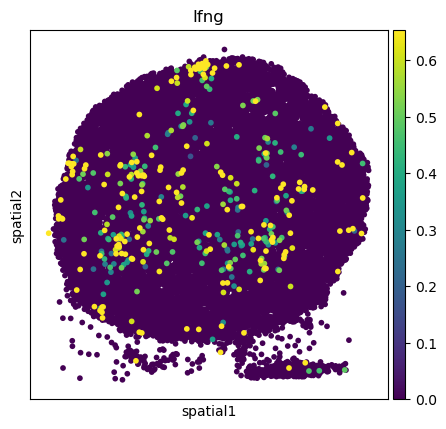

In [7]:
g= "Ifng"
sc.pl.spatial(adata_norm,color = g,spot_size=70, show=False,title=g, vmin=0,vmax='p99.2')

In [83]:
g = "Ifng"
vmax = np.nanpercentile(adata_norm[:, g].X.toarray().flatten() ,99)
print(vmax)

0.0


In [96]:
adata_norm

AnnData object with n_obs × n_vars = 133826 × 31053
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'Index', 'S_score', 'G2M_score', 'phase', 'Celltypes_c2lLN', 'Broad_celltypes', 'Refine_celltypes', 'CD4_CD8_type', 'Bcell_subtype_c2lHTA', 'Region', 'num_ONT_reads', 'num_ONT_umi', 'num_align_reads', 'num_align_umi', 'num_TRBC_reads', 'num_TRBC_umi', 'num_TRAC_reads', 'num_TRAC_umi', 'num_IGKC_reads', 'num_IGKC_umi', 'num_IGLC_reads', 'num_IGLC_umi', 'num_IGHM_reads', 'num_IGHM_umi', 'num_IGHD_reads', 'num_IGHD_umi', 'num_IGHG1_reads', 'num_IGHG1_umi', 'num_IGHG2B_reads', 'num_IGHG2B_umi', 'num_IGHG2C_reads', 'num_IGHG2C_umi', 'num_IGHG3_reads', 'num_IGHG3_umi', 'num_IGHE_reads', 'num_IGHE_umi', 'num_IGHA_reads', 'num_IGHA_umi', 'num_clones_IGH', 'num_clones_IGK', 'num_clones_IGL', 'num_clones_TRA', 'num_clones_TRB', 'IGH_MutFreq', 'IGK_MutFreq', 'IGL_MutFreq', 'TRA_MutFreq', 'TRB_MutFreq', 'IGH_MutCount', 'IGK_MutCount', 

In [ ]:
# Maybe use normalized value, makes more sense
fontprops = fm.FontProperties(size=8)
g = "Ifng"
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
for tp in ["Mock","D3PI","D7PI","D10PI","D14PI","D21PI"]:
    # vmax = np.percentile(adata_norm[:,g].X,99)
    # print(vmax)
    print(tp)
    # Add Padding
    global_min_x, global_max_x, global_min_y, global_max_y = float('inf'), float('-inf'), float('inf'), float('-inf')
    adata = adata_norm[adata_norm.obs['Sample']==tp].copy()
    coords = adata.obsm['spatial']
    global_min_x, global_max_x = min(global_min_x, coords[:, 0].min()), max(global_max_x, coords[:, 0].max())
    global_min_y, global_max_y = min(global_min_y, coords[:, 1].min()), max(global_max_y, coords[:, 1].max())

    # Optional padding
    padding = 50
    global_min_x -= padding
    global_max_x += padding
    global_min_y -= padding
    global_max_y += padding
    

    # Try add scale bar
    fig, ax = plt.subplots(1,1, figsize = (2,2))
    # g = "Ifng"
    sc.pl.spatial(adata_norm[adata_norm.obs['Sample']==tp],color = g,spot_size=60,  ax = ax,show=False,title= "",colorbar_loc=None, vmin=0,vmax=0.7)
    # sc.pl.spatial(adata_comb_fillna[adata_comb_fillna.obs['Sample']==tp], color = g,spot_size=60,  ax = ax,show=False,title="",colorbar_loc=None, vmin=0,vmax=vmax_g,cmap=my_cmap2)
    # sc.pl.spatial(adata_comb_fillna[adata_comb_fillna.obs['Sample']==tp], color = i,spot_size=60,  ax = ax,show=False,title="",colorbar_loc=None, vmin=0,vmax=vmax_i,cmap=my_cmap)
    # Set consistent axes limits
    ax.set_xlim(global_min_x, global_max_x)
    ax.set_ylim(global_max_y, global_min_y)
    ax.set_aspect('equal', adjustable='box')

    # add the scale bar
    scalebar = AnchoredSizeBar(ax.transData, 1.54*500, '', 'lower left',
                                pad=0.5, color='black', frameon=False, size_vertical=0.5,
                                fontproperties=fontprops)
    ax.add_artist(scalebar)
    # save
    plt.savefig('figures/sp_'+g+"_norm_gene_exp_"+tp+".png",dpi = 500,transparent=True)
    plt.savefig('figures/sp_'+g+"_norm_gene_exp_"+tp+".pdf",dpi = 500,transparent=True)

In [84]:
# with scale bar
# plot the scale bar
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(adata_norm[adata_norm.obs['Sample']=="D3PI"], color =g,spot_size=70,show=False,title="D3PI",colorbar_loc='right', vmin=0,vmax=0.7,save="Ifng_exp_D3PI_scalebar.pdf")

[<Axes: title={'center': 'D3PI'}, xlabel='spatial1', ylabel='spatial2'>]

## Normalized genes for the line plot

In [91]:
adata

AnnData object with n_obs × n_vars = 22890 × 31053
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'Index', 'S_score', 'G2M_score', 'phase', 'Celltypes_c2lLN', 'Broad_celltypes', 'Refine_celltypes', 'CD4_CD8_type', 'Bcell_subtype_c2lHTA', 'Region', 'num_ONT_reads', 'num_ONT_umi', 'num_align_reads', 'num_align_umi', 'num_TRBC_reads', 'num_TRBC_umi', 'num_TRAC_reads', 'num_TRAC_umi', 'num_IGKC_reads', 'num_IGKC_umi', 'num_IGLC_reads', 'num_IGLC_umi', 'num_IGHM_reads', 'num_IGHM_umi', 'num_IGHD_reads', 'num_IGHD_umi', 'num_IGHG1_reads', 'num_IGHG1_umi', 'num_IGHG2B_reads', 'num_IGHG2B_umi', 'num_IGHG2C_reads', 'num_IGHG2C_umi', 'num_IGHG3_reads', 'num_IGHG3_umi', 'num_IGHE_reads', 'num_IGHE_umi', 'num_IGHA_reads', 'num_IGHA_umi', 'num_clones_IGH', 'num_clones_IGK', 'num_clones_IGL', 'num_clones_TRA', 'num_clones_TRB', 'IGH_MutFreq', 'IGK_MutFreq', 'IGL_MutFreq', 'TRA_MutFreq', 'TRB_MutFreq', 'IGH_MutCount', 'IGK_MutCount', '

In [ ]:
corr_genes = ["Ifng"]
out_genelist = []
adata_d3_norm = adata_norm[adata_norm.obs['Sample']=="D3PI"]
for g in corr_genes:
    eg = "ge_norm_"+g
    out_genelist.append(eg)
    print(eg)
    adata_d3_norm.obs[eg] = adata_d3_norm[:,g].X.toarray()
meta_scale = adata_d3_norm.obs[['Index']+out_genelist]
# output to csv
meta_scale.to_csv("../output_files/Fig_IFNG/adata_D3PI_norm_Ifng.csv",index=False)

In [94]:
adata_d3_scale = adata.copy()
sc.pp.normalize_total(adata_d3_scale)
sc.pp.log1p(adata_d3_scale)
sc.pp.regress_out(adata_d3_scale, ["total_counts"])
sc.pp.scale(adata_d3_scale, max_value=5)

corr_genes = ["Ifng"]
out_genelist = []
for g in corr_genes:
    eg = "ge_scale_"+g
    out_genelist.append(eg)
    print(eg)
    adata_d3_scale.obs[eg] = adata_d3_scale[:,g].X.toarray()
meta_scale = adata_d3_scale.obs[['Index']+out_genelist]
# output to csv
meta_scale.to_csv("../output_files/Fig_IFNG/adata_D3PI_scale_Ifng.csv",index=False)

ge_scale_Ifng


# Workflow: Extract Ifng activation niches

In [9]:
adata_bin = sc.read_h5ad("../output_files/objects/adata_bin30um_comb_raw_wLR.h5ad")
adata_bin = adata_bin[adata_bin.obs['Sample']=="D3PI"]

In [10]:
# normalize & scale
sc.pp.normalize_total(adata_bin)
sc.pp.log1p(adata_bin)
sc.pp.regress_out(adata_bin, ["total_counts"])
sc.pp.scale(adata_bin, max_value=10)

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/tmp/ipykernel_2470871/2133974758.py:9: ImplicitModificationWarning: Setting element `.obsm['spatial_distances']` of view, initializing view as actual.
  adata_bin_ifng.obsm["spatial_distances"] = scisp.distance.squareform(scisp.distance.pdist(adata_bin_ifng.obsm['spatial']))
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to av

spatial_neighbors_100_true
1    45
2    16
3     6
4     5
6     4
7     3
8     1
Name: count, dtype: int64


/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'ifng_rad'}, xlabel='spatial1', ylabel='spatial2'>]

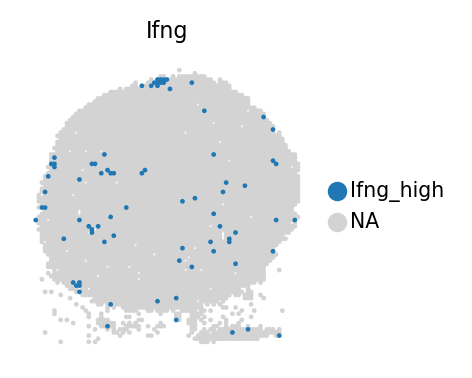

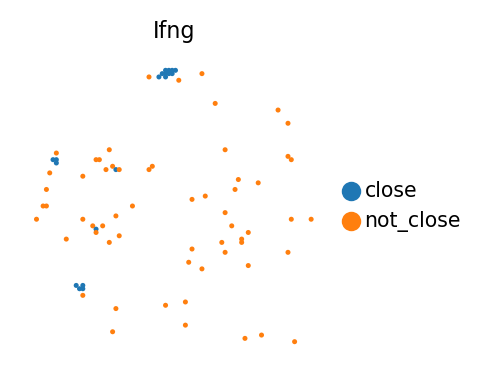

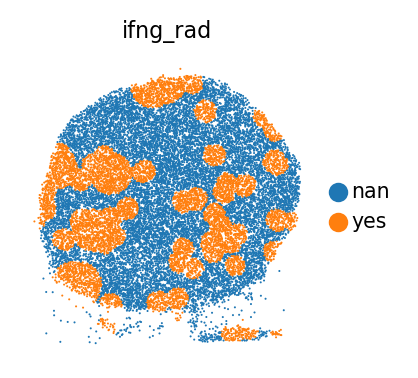

In [25]:
sc.settings.set_figure_params(dpi=100, dpi_save= 100, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
g = 'Ifng'
exp = 4; close_neighbor = 3
adata_bin.obs['Ifng_exp'] = adata_bin[:,g].X.toarray()
adata_bin.obs['Ifng_level'] = adata_bin.obs['Ifng_exp'].apply(lambda x: 'Ifng_high' if x >=exp else np.nan)
sc.pl.spatial(adata_bin,color = 'Ifng_level',spot_size=70, show=False,title=g, vmin=0,vmax='p99.2')
adata_bin_ifng = adata_bin[adata_bin.obs['Ifng_level']=="Ifng_high"]
# filter
adata_bin_ifng.obsm["spatial_distances"] = scisp.distance.squareform(scisp.distance.pdist(adata_bin_ifng.obsm['spatial']))
adata_bin_ifng.obs["spatial_neighbors_100_true"] = np.sum(adata_bin_ifng.obsm["spatial_distances"] < 100, axis=0)
print(adata_bin_ifng.obs["spatial_neighbors_100_true"].value_counts())
adata_bin_ifng.obs['close_neighbors'] = adata_bin_ifng.obs["spatial_neighbors_100_true"].apply(lambda x: 'close' if x >=close_neighbor else 'not_close')
sc.pl.spatial(adata_bin_ifng,color = 'close_neighbors',spot_size=70, show=False,title=g, vmin=0,vmax='p99.2')

# map the ifng high but not close to the barcode coordinate
coords_comb = pd.read_pickle("../output_files/objects/bin30um_comb_coords_HarmLeiden07.pkl") # The file is from pLN_bin_DR_allTP.ipynb the Region analysis
coords_comb = coords_comb.loc[adata_bin.obs.index]
coords_comb['Ifng_high_close'] = adata_bin_ifng.obs['close_neighbors']
rad = 100 # um
pix_rad = rad * 1.54
coords_comb.index = coords_comb['Index']
coords_comb[['x','y']] = adata.obs[['x','y']]
coords_comb['ifng_rad'] = np.nan
points_matrix = coords_comb[['x','y']]
ids = coords_comb[coords_comb['Ifng_high_close']=='not_close'].index
# for high but not close
for i in ids:
    specific_point = coords_comb.loc[i,['x','y']].astype(float).to_numpy()
    coords_comb['distances'] = scisp.distance.cdist(points_matrix, np.expand_dims(specific_point, axis=0))
    # coords_comb['ifng_rad'] = coords_comb[['ifng_rad','distances']].apply(lambda x: 'yes' if x['distances'] <= pix_rad else x['ifng_rad'])
    coords_comb['ifng_rad'] = np.where(coords_comb['distances'] <= pix_rad, 'yes',coords_comb['ifng_rad'])
# for high and close
rad = 200
pix_rad = rad * 1.54
ids = coords_comb[coords_comb['Ifng_high_close']=='close'].index
for i in ids:
    specific_point = coords_comb.loc[i,['x','y']].astype(float).to_numpy()
    coords_comb['distances'] = scisp.distance.cdist(points_matrix, np.expand_dims(specific_point, axis=0))
    # coords_comb['ifng_rad'] = coords_comb[['ifng_rad','distances']].apply(lambda x: 'yes' if x['distances'] <= pix_rad else x['ifng_rad'])
    coords_comb['ifng_rad'] = np.where(coords_comb['distances'] <= pix_rad, 'yes',coords_comb['ifng_rad'])
    
adata_dist_v2 = adata.copy()
adata_dist_v2.obs['ifng_rad'] = coords_comb['ifng_rad']
sc.pl.spatial(adata_dist_v2, color = 'ifng_rad',spot_size=30,show=False)

## Find a control niche

ifng_rad
nan    5220
yes       0
Name: count, dtype: int64


/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


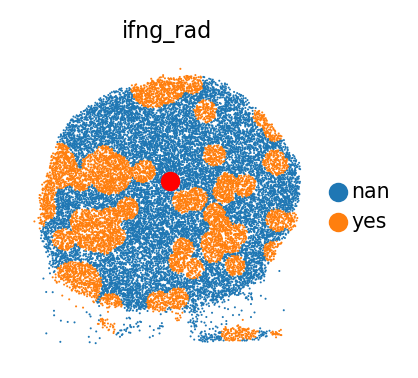

Ifng_control
control    502
Name: count, dtype: int64


/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'Ifng_control'}, xlabel='spatial1', ylabel='spatial2'>]

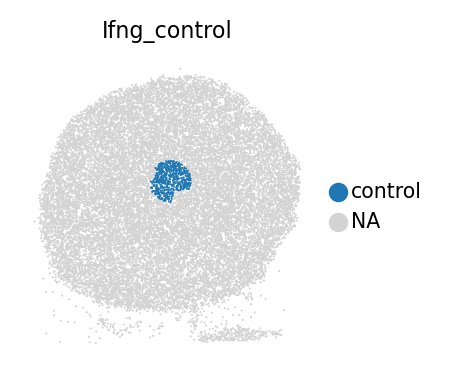

In [26]:
adata_dist_v2.obs['Region_Leiden_0.7'] = coords_comb['Region_Leiden_0.7']
gc_df = adata_dist_v2.obs[['Region_Leiden_0.7','x','y','ifng_rad']]
tmp_gc_df = gc_df[(gc_df.ifng_rad == "nan") & (gc_df['Region_Leiden_0.7']== "Inner Cortex")]
print(tmp_gc_df.ifng_rad.value_counts())
cm = np.median(tmp_gc_df[['x','y']],axis=0)
f = sc.pl.spatial(adata_dist_v2, color = 'ifng_rad',spot_size=30,show=False)
plt.plot(cm[0],cm[1],'ro')
plt.show()

# now get the beads surrond the centroid
rad = 200 #um
pix_rad = rad * 1.54
points_matrix = adata_dist_v2.obsm['spatial']
specific_point = cm
distances = scisp.distance.cdist(points_matrix, np.expand_dims(specific_point, axis=0))
adata_dist_v2.obs['distance'] = distances
# adata_dist_v2.obs['Ifng_control'] = adata_dist_v2.obs['Ifng_control'].apply(lambda x: 'control' if x ==True else np.nan)
adata_dist_v2.obs['Ifng_control'] = adata_dist_v2.obs.apply(lambda x: 'control' if ((x['distance']<= pix_rad) and (x['ifng_rad']=='nan')) else np.nan, axis=1)
# adata_dist_v2.obs['Ifng_control'] =
print(adata_dist_v2.obs['Ifng_control'].value_counts())
sc.pl.spatial(adata_dist_v2, color ='Ifng_control',spot_size=30,show=False)

## Second step: Continue on the close ones

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/tmp/ipykernel_2470871/272968557.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_bin_ifng.obs['Kmean_clust'] = clust_lab.astype(str)
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map)

[<Axes: title={'center': 'Ifng'}, xlabel='spatial1', ylabel='spatial2'>]

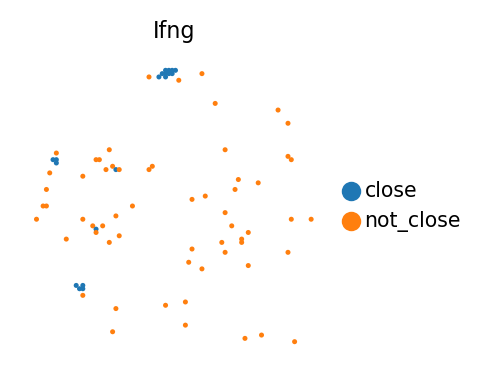

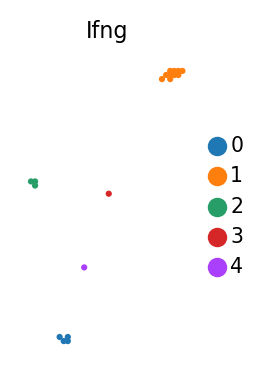

In [27]:
sc.pl.spatial(adata_bin_ifng,color = 'close_neighbors',spot_size=70, show=False,title=g, vmin=0,vmax='p99.2')
from sklearn.cluster import KMeans
adata_bin_ifng = adata_bin_ifng[adata_bin_ifng.obs['close_neighbors']=='close']
coordinates = adata_bin_ifng.obsm['spatial']
kmeans = KMeans(n_clusters=5,n_init=25,random_state=1234)
kmeans.fit(coordinates)
clust_lab = kmeans.labels_
adata_bin_ifng.obs['Kmean_clust'] = clust_lab.astype(str)
sc.pl.spatial(adata_bin_ifng,color = 'Kmean_clust',spot_size=70, show=False,title=g)

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


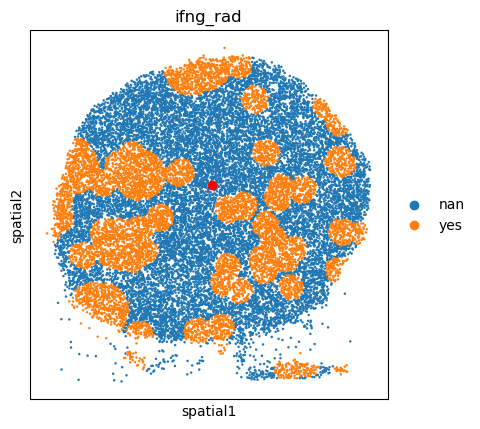

In [21]:
# 3. Transfer the label to barcode anndata
adata_dist = adata.copy()
coords_comb = pd.read_pickle("../pyobjs/bin30um_comb_coords_HarmLeiden07.pkl")
coords_comb = coords_comb.loc[adata_bin.obs.index]
coords_comb['Ifng_highclose_Kmeans_clust'] = adata_bin_ifng.obs['Kmean_clust']
coords_comb = coords_comb[['Index','Ifng_highclose_Kmeans_clust']]
meta = adata_dist.obs
# meta.index = meta['barcode']
meta = coords_comb.join(meta.set_index('Index'), on = 'Index', how = 'right')
meta.index = meta.Index
adata_dist.obs = meta
sc.pl.spatial(adata_dist,color = 'Ifng_highclose_Kmeans_clust',spot_size=70, show=False,title=g)

In [22]:
# 4. get the centroid and surrond a group of cells
gc_df = adata_dist.obs[['Ifng_highclose_Kmeans_clust','x','y']]
gc_df['centroid_x'] = np.nan;gc_df['centroid_y'] = np.nan
for i in ['0','1','2','3','4']:
    tmp_gc_df = gc_df[gc_df['Ifng_highclose_Kmeans_clust']==i]
    # calculate the centroid
    cm = np.mean(tmp_gc_df[['x','y']],axis=0)
    gc_df.loc[tmp_gc_df.index,'centroid_x'] = cm[0];gc_df.loc[tmp_gc_df.index,'centroid_y'] = cm[1]
adata_dist.obs[['centroid_x','centroid_y']] = gc_df[['centroid_x','centroid_y']]

Ifng_control
control    502
Name: count, dtype: int64


/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'Ifng_control'}, xlabel='spatial1', ylabel='spatial2'>]

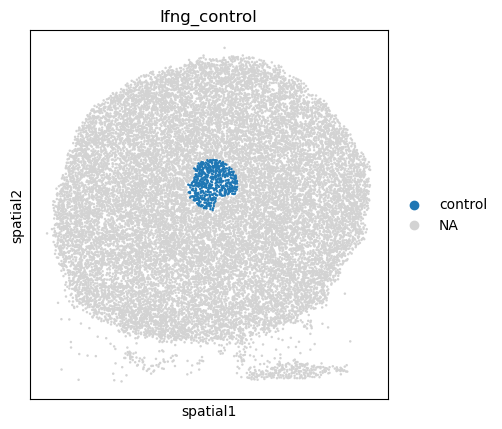

In [23]:
sc.pl.spatial(adata_dist_v2, color ='Ifng_control',spot_size=30,show=False)

## Third step: get another niche for the Ifng_in, balance comparison between in and out

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/tmp/ipykernel_2470871/2838478825.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_bin_ifng.obs['Kmean_clust'] = clust_lab.astype(str)
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_ma

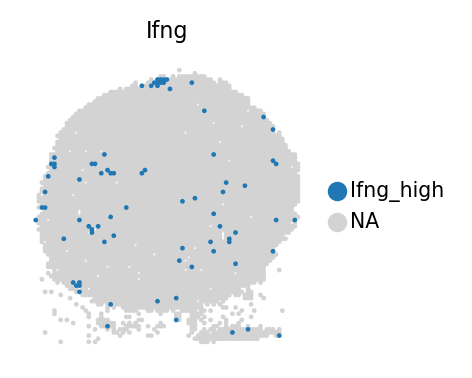

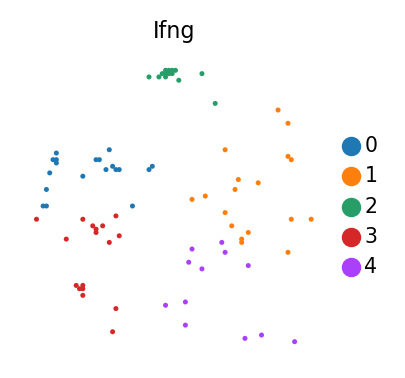

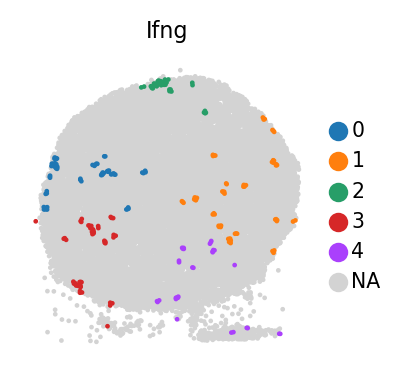

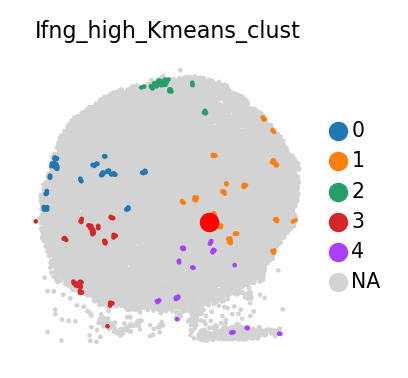

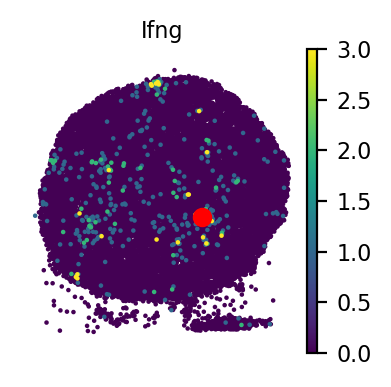

In [29]:
## Establish the Niches
g = 'Ifng'
exp = 4; close_neighbor = 3
adata_bin.obs['Ifng_exp'] = adata_bin[:,g].X.toarray()
adata_bin.obs['Ifng_level'] = adata_bin.obs['Ifng_exp'].apply(lambda x: 'Ifng_high' if x >=exp else np.nan)
sc.pl.spatial(adata_bin,color = 'Ifng_level',spot_size=70, show=False,title=g, vmin=0,vmax='p99.2')
adata_bin_ifng = adata_bin[adata_bin.obs['Ifng_level']=="Ifng_high"]
# Kmeans on the adata_bin_ifng?
from sklearn.cluster import KMeans
# adata_bin_ifng = adata_bin_ifng[adata_bin_ifng.obs['close_neighbors']=='close']
coordinates = adata_bin_ifng.obsm['spatial']
kmeans = KMeans(n_clusters=5,n_init=25,random_state=1234)
kmeans.fit(coordinates)
clust_lab = kmeans.labels_
adata_bin_ifng.obs['Kmean_clust'] = clust_lab.astype(str)
sc.pl.spatial(adata_bin_ifng,color = 'Kmean_clust',spot_size=70, show=False,title=g)
## Transfer the label
# get D3PI
adata = adata_comb[adata_comb.obs['Sample']=="D3PI"].copy()

coords_comb = pd.read_pickle("../output_files/objects/bin30um_comb_coords_HarmLeiden07.pkl")
coords_comb = coords_comb.loc[adata_bin.obs.index]
coords_comb['Ifng_high_Kmeans_clust'] = adata_bin_ifng.obs['Kmean_clust']
coords_comb = coords_comb[['Index','Ifng_high_Kmeans_clust','Region_Leiden_0.7']]
meta = adata.obs
meta.index = meta['barcode']
meta = coords_comb.join(meta.set_index('Index'), on = 'Index', how = 'right')
meta.index = meta.Index
adata.obs = meta
sc.pl.spatial(adata,color = 'Ifng_high_Kmeans_clust',spot_size=70, show=False,title=g)


## Label the ones from Inner Cortex
gc_df = adata.obs[['Ifng_high_Kmeans_clust','x','y','Region_Leiden_0.7']]
gc_df['centroid_x'] = np.nan;gc_df['centroid_y'] = np.nan
# for i in ['2','4']:
tmp_gc_df = gc_df[(gc_df['Ifng_high_Kmeans_clust'].isin(['1','4'])) & (gc_df['Region_Leiden_0.7']== "Inner Cortex")]
# calculate the centroid
cm = np.mean(tmp_gc_df[['x','y']],axis=0)
gc_df.loc[tmp_gc_df.index,'centroid_x'] = cm[0];gc_df.loc[tmp_gc_df.index,'centroid_y'] = cm[1]
adata.obs[['centroid_x','centroid_y']] = gc_df[['centroid_x','centroid_y']]
centroids = adata.obs[['centroid_x','centroid_y']].drop_duplicates().dropna()
# centroids
sc.pl.spatial(adata, color ="Ifng_high_Kmeans_clust",spot_size=70,show=False)
plt.plot(centroids.iloc[0][0],centroids.iloc[0][1],'ro')

sc.pl.spatial(adata, color ="Ifng",spot_size=70,show=False,vmax=3)
plt.plot(centroids.iloc[0][0],centroids.iloc[0][1],'ro')

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'Ifng_within_low'}, xlabel='spatial1', ylabel='spatial2'>]

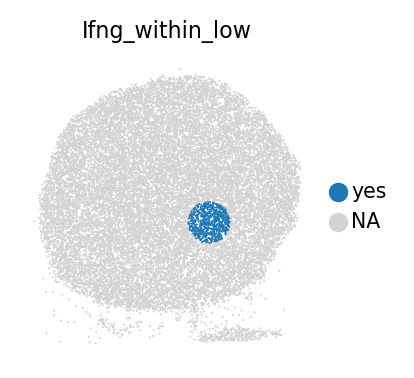

In [30]:
# Now, get the beads surround the centroids
rad = 200 #um
pix_rad = rad * 1.54
adata_dist = adata.copy()
points_matrix = adata_dist.obsm['spatial']
# for i in ['2','4']:
specific_point = adata_dist.obs.loc[adata_dist.obs['Ifng_high_Kmeans_clust'].isin(['2','4']),['centroid_x','centroid_y']].dropna().to_numpy()[0]
distances = scisp.distance.cdist(points_matrix, np.expand_dims(specific_point, axis=0))
colname = 'Ifng_within_low'
adata_dist.obs[colname] = distances <= pix_rad
adata_dist.obs[colname] = adata_dist.obs[colname].apply(lambda x: 'yes' if x ==True else np.nan)
sc.pl.spatial(adata_dist, color =colname,spot_size=30,show=False)

## Merge these two steps label

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'Ifng_group_v2'}, xlabel='spatial1', ylabel='spatial2'>]

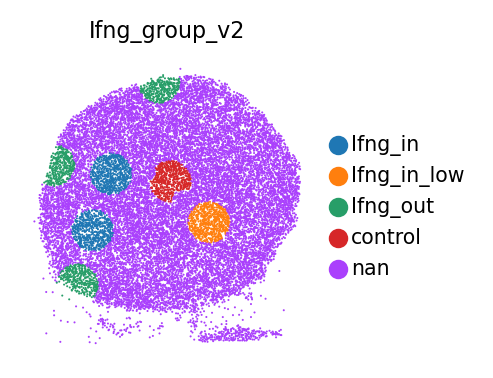

In [31]:
adata_dist_prev = sc.read_h5ad("/fs/cbsuvlaminck5/workdir/sj657/lymph_node/for_public/output_files/adata_D3PI_Niches_wIfng_dist.h5ad")
# Transfer the centroid
adata_dist_prev.obs.loc[pd.isna(adata_dist_prev.obs['centroid_x']),['centroid_x','centroid_y']] = adata_dist.obs[['centroid_x','centroid_y']]

adata_dist_prev.obs['Ifng_group'] = adata_dist_prev.obs['Ifng_group'].astype(str)
adata_dist_prev.obs['Ifng_group_v2'] = adata_dist_prev.obs['Ifng_group_v2'].astype(str)
# Get the new label for the Ifng_group & Ifng_group_v2
tmp_ind = adata_dist.obs[adata_dist.obs['Ifng_within_low']=='yes'].index
adata_dist_prev.obs.loc[tmp_ind,['Ifng_group','Ifng_group_v2']] = ['Ifng_within_low','Ifng_in_low']
# Add the centroid for control
adata_dist_prev.obs.loc[adata_dist_prev.obs['Ifng_group_v2']=='control',['centroid_x','centroid_y']] = [3143.7,2801.5]
sc.pl.spatial(adata_dist_prev, color ="Ifng_group_v2",spot_size=30,show=False)

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/tmp/ipykernel_2470871/3029832136.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(centroids.iloc[0][0],centroids.iloc[0][1],'ro')
/tmp/ipykernel_2470871/3029832136.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[po

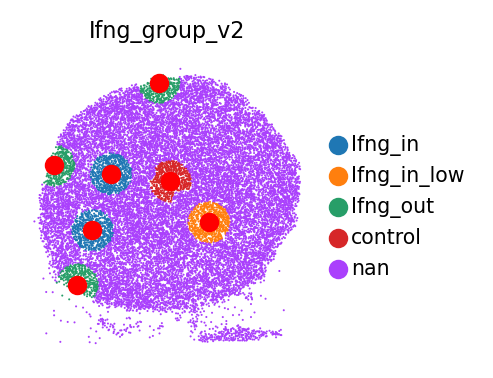

In [32]:
centroids = adata_dist_prev.obs[['centroid_x','centroid_y']].drop_duplicates().dropna()
centroids
sc.pl.spatial(adata_dist_prev, color ="Ifng_group_v2",spot_size=30,show=False)
plt.plot(centroids.iloc[0][0],centroids.iloc[0][1],'ro')
plt.plot(centroids.iloc[1][0],centroids.iloc[1][1],'ro')
plt.plot(centroids.iloc[2][0],centroids.iloc[2][1],'ro')
plt.plot(centroids.iloc[3][0],centroids.iloc[3][1],'ro')
plt.plot(centroids.iloc[4][0],centroids.iloc[4][1],'ro')
plt.plot(centroids.iloc[5][0],centroids.iloc[5][1],'ro')
plt.plot(centroids.iloc[6][0],centroids.iloc[6][1],'ro')

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


[<Axes: title={'center': 'Ifng_Niche'}, xlabel='spatial1', ylabel='spatial2'>]

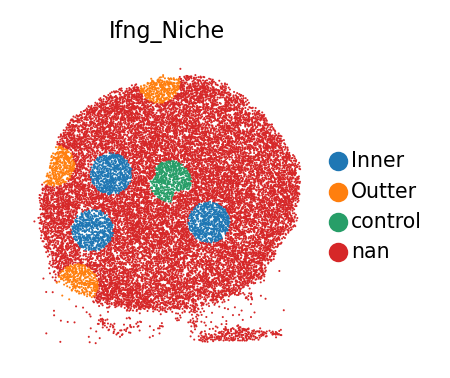

In [33]:
# rename the label
adata_dist_prev.obs['Ifng_Niche'] = adata_dist_prev.obs['Ifng_group_v2'].astype(str)
adata_dist_prev.obs.loc[adata_dist_prev.obs['Ifng_group_v2']=="Ifng_out","Ifng_Niche"] = "Outter"
adata_dist_prev.obs.loc[adata_dist_prev.obs['Ifng_group_v2'].isin(["Ifng_in","Ifng_in_low"]),"Ifng_Niche"] = "Inner"
sc.pl.spatial(adata_dist_prev, color ="Ifng_Niche",spot_size=30,show=False)

## Done!!! Save this object

In [34]:
# save this object
adata_dist_prev.write_h5ad("../output_files/objects/adata_D3PI_Niches_wIfng_dist.h5ad")

## Calculate the distance between the centroids

In [35]:
dist_meta = adata_dist_prev.obs.copy()
points_matrix = adata_dist_prev.obsm['spatial']
rad = 200 #um
pix_rad = rad * 1.54
colname = 'Ifng_group'
for i in ['0','1','2','3','4','C','in_low']:
    print(i)
    if i == 'in_low': # not control
        specific_point = dist_meta.loc[dist_meta['Ifng_group_v2']=='Ifng_in_low',['centroid_x','centroid_y']].dropna().to_numpy()[0]
        print(specific_point)
        l = "InLow"
    elif i == "C":
        specific_point = dist_meta.loc[dist_meta['Ifng_group_v2']=='control',['centroid_x','centroid_y']].dropna().to_numpy()[0]
        print(specific_point)
        l = "C"
    else:
        specific_point = dist_meta.loc[dist_meta['Ifng_highclose_Kmeans_clust']==i,['centroid_x','centroid_y']].dropna().to_numpy()[0]
        print(specific_point)
        l = i
    
    distances = scisp.distance.cdist(points_matrix, np.expand_dims(specific_point, axis=0))
    distname =  'distance_w'+l
    print(distname)
    dist_meta[distname] = distances
    dist_meta[colname] = np.where(dist_meta[distname] <= pix_rad,'Ifng_within_'+i,dist_meta[colname])

0
[1773.42307692 4328.62307692]
distance_w0
1
[2981.10967742 1342.06774194]
distance_w1
2
[1426.5        2563.39166667]
distance_w2
3
[2271.7  2690.05]
distance_w3
4
[1995.85 3522.1 ]
distance_w4
C
[3143.7 2801.5]
distance_wC
in_low
[3718.46111111 3405.42222222]
distance_wInLow


## Might be interested to check the cell type probability related to each centroid

In [37]:
# cell2location matrix
adata_c2l = sc.read_h5ad("../output_files/objects/adata_allTP_c2l_Human_LN_mod_celltype_0122_batch.h5ad")
adata_c2l = adata_c2l[adata_dist_prev.obs.index]
# Aggregate some columns
adata_c2l.obs['Myeloid_prob'] = adata_c2l.obs[['Macrophage','Monocytes','DCs']].sum(1)
adata_c2l.obs['T_prob'] = adata_c2l.obs[['T_CD4+','T_CD8+','T_Cycling','T_reg']].sum(1)
adata_c2l.obs['B_prob'] = adata_c2l.obs[['B_GC','B_mem','B_naive','B_plasma','B_Cycling']].sum(1)
adata_c2l.obs['Stromal_prob'] = adata_c2l.obs[['Endo','VSMC']].sum(1)
adata_c2l.obs['NK_prob'] = adata_c2l.obs['NK_ILC']
dist_meta[['Myeloid_prob','T_prob','B_prob','NK_prob','Stromal_prob']] = adata_c2l.obs[['Myeloid_prob','T_prob','B_prob','NK_ILC','Stromal_prob']]

/tmp/ipykernel_2470871/3458183949.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_c2l.obs['Myeloid_prob'] = adata_c2l.obs[['Macrophage','Monocytes','DCs']].sum(1)


In [38]:
dist_meta.to_csv("../output_files/Fig_IFNG/adata_D3PI_Niches_wIfng_dist.csv")

## Fig on Ifng niches marker plot

/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


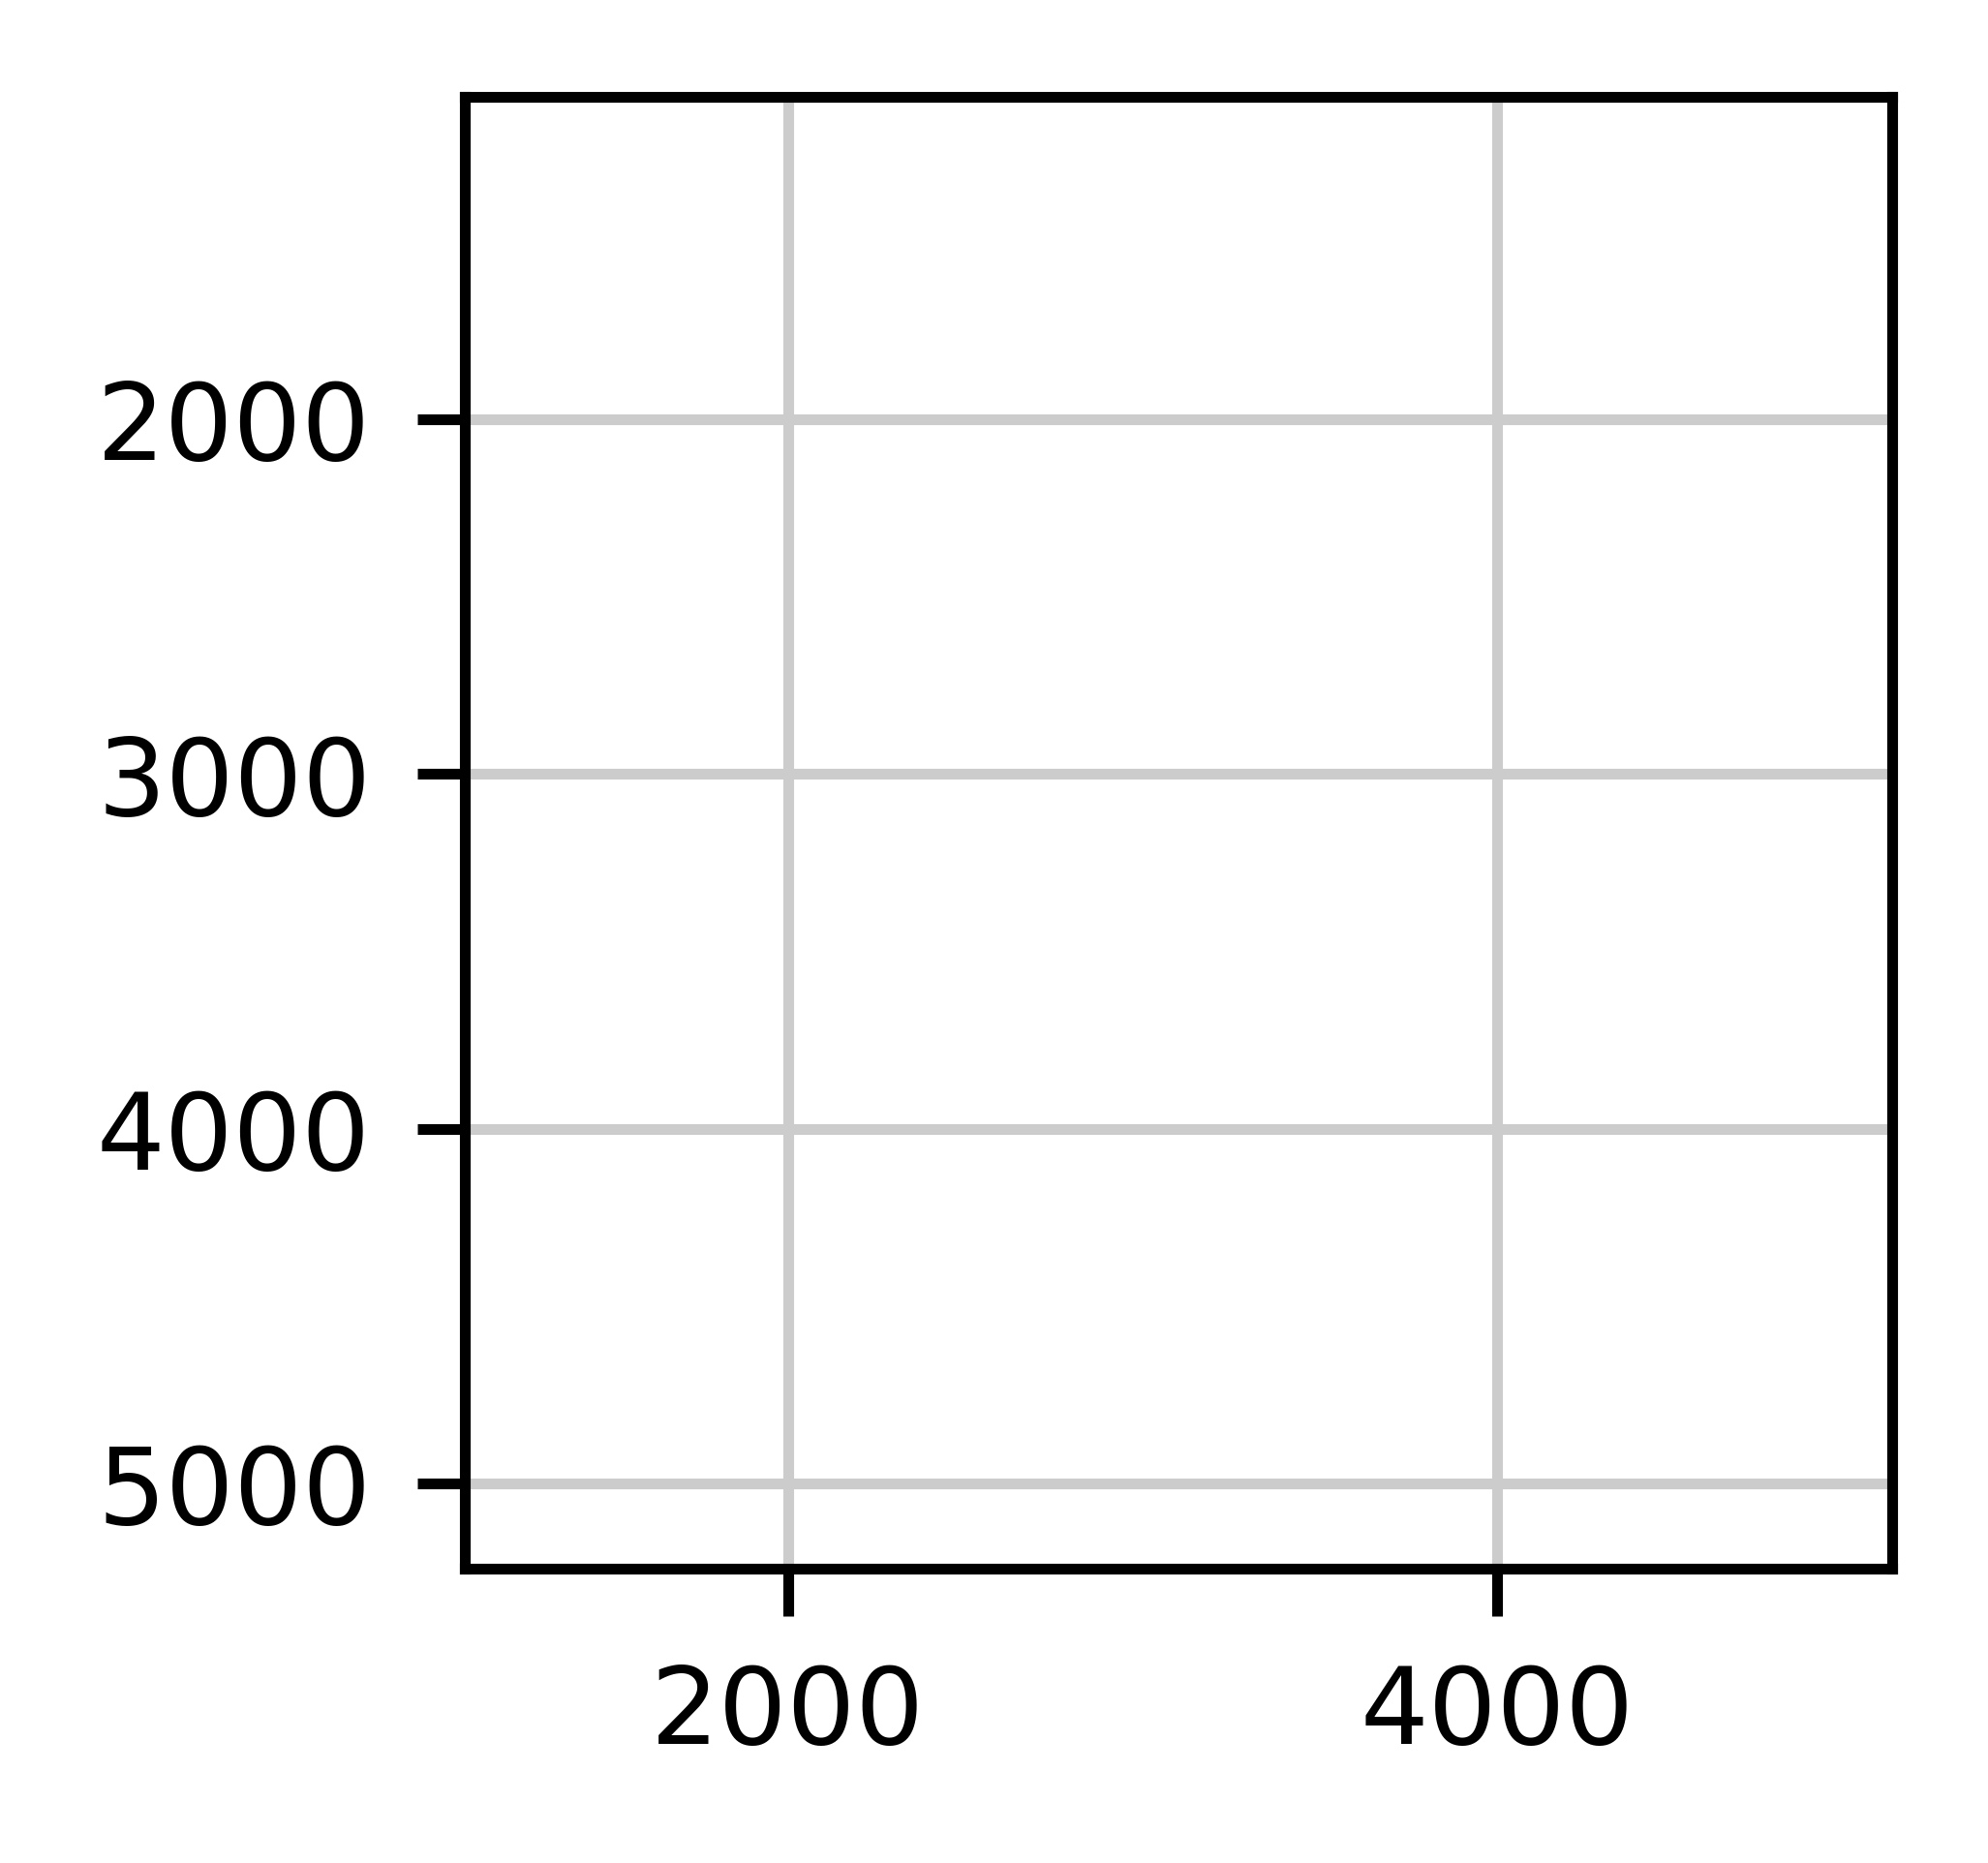

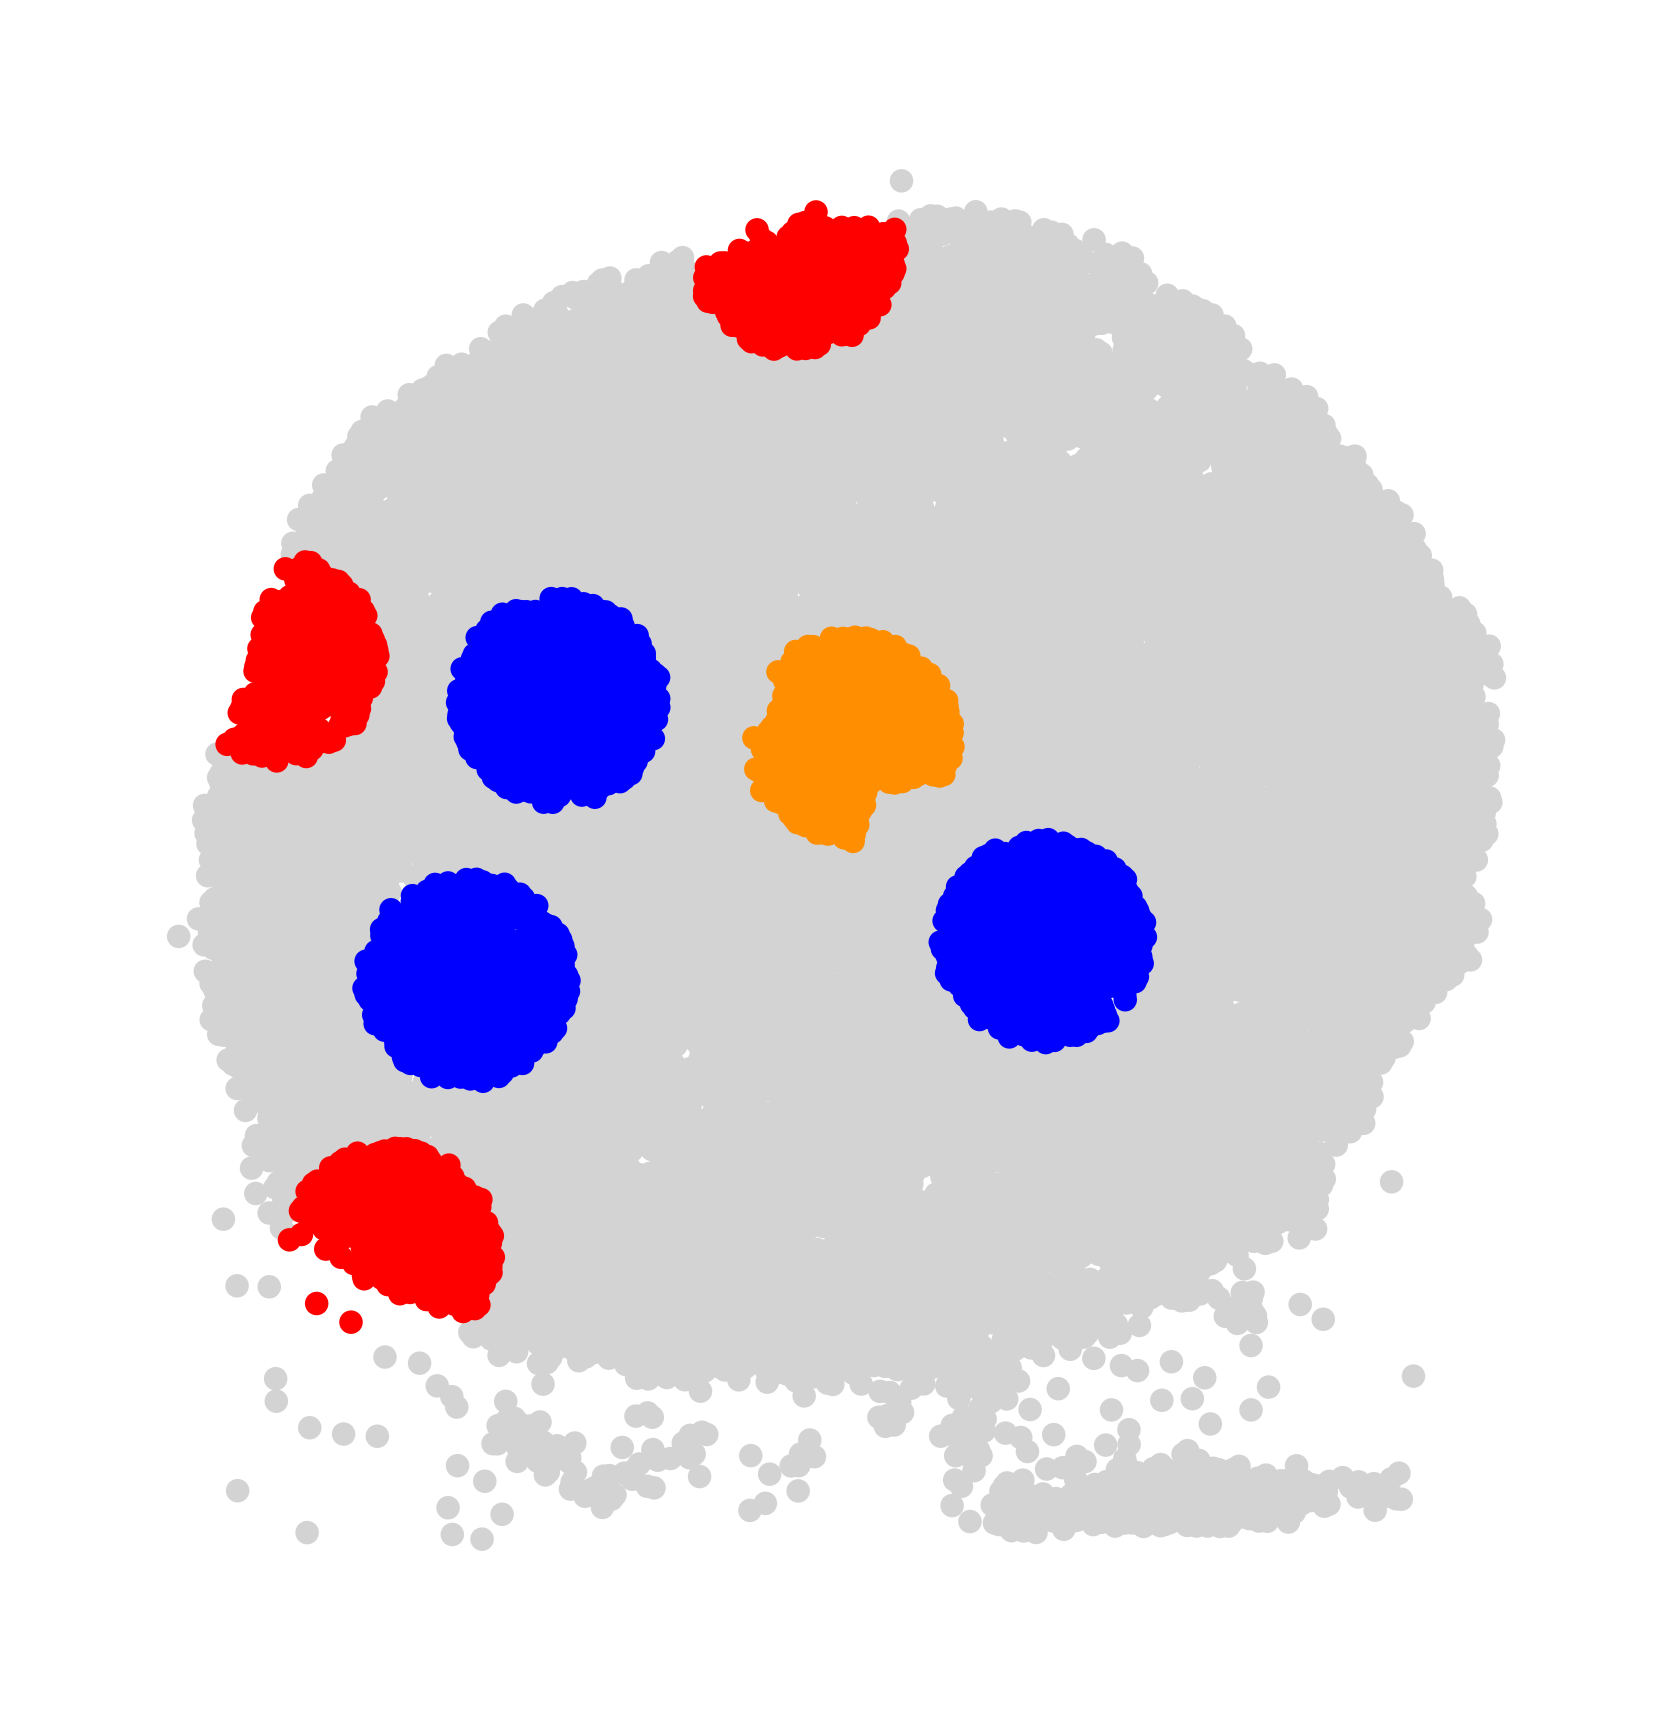

In [95]:
adata_dist_prev.obs.loc[adata_dist_prev.obs['Ifng_group_v2']=='Ifng_in_low','Ifng_group_v2'] = 'Ifng_in'
# make Nan
adata_dist_prev.obs['Ifng_group_v2'] = adata_dist_prev.obs['Ifng_group_v2'].astype(str)
adata_dist_prev.obs.loc[adata_dist_prev.obs['Ifng_group_v2']=='nan','Ifng_group_v2'] = np.nan

color_dict = {'Ifng_in': 'blue',
              'Ifng_out': 'red',
              'control': '#FF8F00'}
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
global_min_x, global_max_x, global_min_y, global_max_y = float('inf'), float('-inf'), float('inf'), float('-inf')
adata = adata_dist_prev.copy()
coords = adata.obsm['spatial']
global_min_x, global_max_x = min(global_min_x, coords[:, 0].min()), max(global_max_x, coords[:, 0].max())
global_min_y, global_max_y = min(global_min_y, coords[:, 1].min()), max(global_max_y, coords[:, 1].max())

# Optional padding
padding = 50
global_min_x -= padding
global_max_x += padding
global_min_y -= padding
global_max_y += padding
fig, ax = plt.subplots(1,1, figsize = (2,2))
sc.pl.spatial(adata, color ="Ifng_group_v2",spot_size=70,show=False,palette = color_dict,legend_loc=None,title="")

# Set consistent axes limits
ax.set_xlim(global_min_x, global_max_x)
ax.set_ylim(global_max_y, global_min_y)
ax.set_aspect('equal', adjustable='box')

# save
plt.savefig('figures/Ifng_Niche/D3PI_Ifng_group_v2_circle.png',dpi = 500,transparent=True)
plt.savefig('figures/Ifng_Niche/D3PI_Ifng_group_v2_circle.pdf',dpi = 500,transparent=True)

# Spatial autocorrelation analysis

In [39]:
print("Importing matplotlib.pyplot...", end = '')
import matplotlib.pyplot as plt
print(" done :)")
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import os
import sys
import time
import re
print("Importing pandas...", end = '')
import pandas as pd
print(" done :)")
print("Importing seaborn...", end = '')
import seaborn as sns
print(" done :)")
print("Importing scanpy...", end = '')
import scanpy as sc
print(" done :)")
import numpy as np
import scipy.spatial as scisp
import math
import anndata as ad
# import plotly.graph_objects as go
import scanpy.external as sce
import scipy.sparse as sp

from gaussian_smoothing_functions import *

Importing matplotlib.pyplot... done :)
Importing pandas... done :)
Importing seaborn... done :)
Importing scanpy... done :)


In [40]:
sc.settings.verbosity = 1 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=True, figsize=(5, 5))
sc.settings.n_jobs=20
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

/tmp/ipykernel_2470871/1022765922.py:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['domain'] = adata_gst.obs['domain']
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/sj657/miniconda3/envs/c2l_env/lib/python3.9/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` 

[<Axes: xlabel='spatial1', ylabel='spatial2'>]

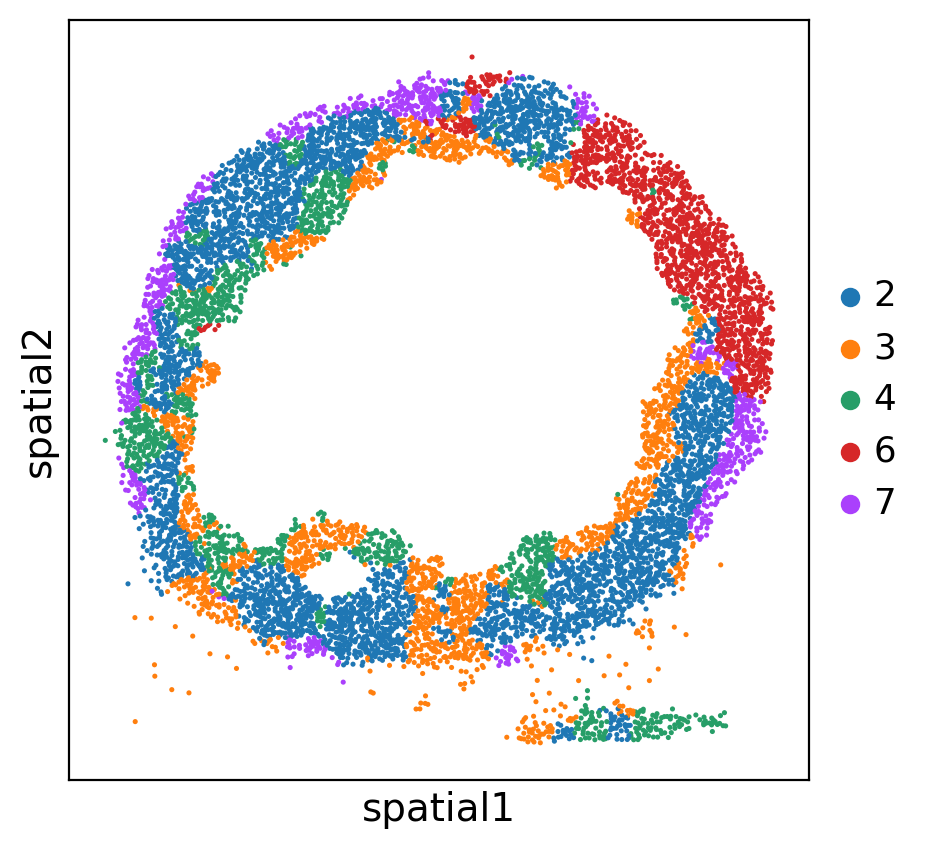

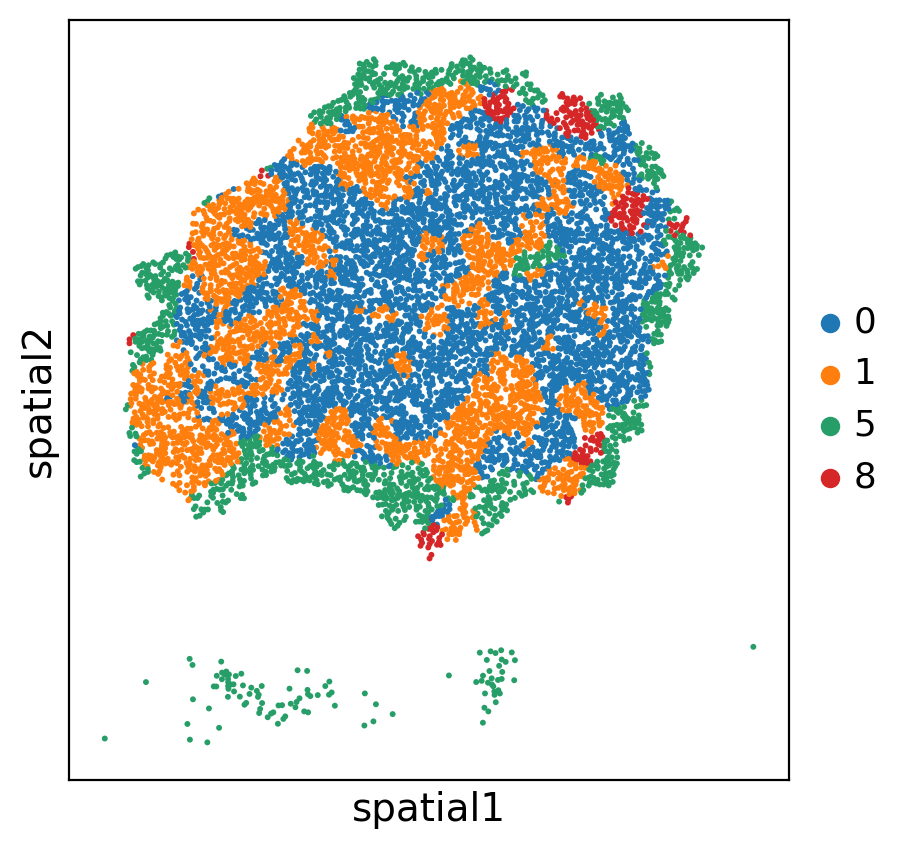

In [41]:
adata_comb = sc.read_h5ad("../output_files/objects/adata_comb_allTP_whole_meta_raw.h5ad")
adata = adata_comb[adata_comb.obs['Sample']=='D3PI'].copy()
# ADD .VAR VALUES
adata.var['total_counts'] = np.sum(adata.X, axis=0).reshape(-1,1)
# NORMALIZAION
# TPM + log1p normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
# Add log1p total counts to .var
adata.var['log1p_total_counts'] = np.sum(adata.X, axis=0).reshape(-1,1)
# filtering
GENE_COUNT_THRESHOLD = 50
adata = adata[:,adata.var['total_counts'] >= GENE_COUNT_THRESHOLD]
adata.obs.index = adata.obs['barcode']
# separate into regions for Gaussian smoothing
adata_gst = sc.read_h5ad("../output_files/objects/GraphST_objects/adata_D3_GraphST_leiden.h5ad")
adata.obs['domain'] = adata_gst.obs['domain']
# Outer
adata_out = adata[adata.obs['domain'].isin(['2','3','4','6','7'])]
sc.pl.spatial(adata_out, color = 'domain',title='',spot_size=30,show=False)
# Inner
adata_in = adata[adata.obs['domain'].isin(['0','1','5','8'])]
sc.pl.spatial(adata_in, color = 'domain',title='',spot_size=30,show=False)

## Gaussian function

In [42]:
def gauss_process(adata_input=adata_out,gaus_sd = 100):

    ## Make grid of points and apply the grid to adata coordinates

    # find edges of grid
    max_X, min_X = adata_input.obs['x'].max(), adata_input.obs['x'].min()
    max_Y, min_Y = adata_input.obs['y'].max(), adata_input.obs['y'].min()

    # find ranges of grid
    print("Variation in X-direction: " + str(max_X - min_X))
    print("Variation in Y-direction: " + str(max_Y - min_Y))


    # CHOOSE: define the square grid size
    GRID_SIZE = (max_X - min_X) / 200
    # CHOOSE: shift alternating rows by 1/2 grid size to make hexagonal arrangement?
    IS_HEX_GRID = True

    # generate grid
    adata_grid = make_grid2(max_X, min_X, max_Y, min_Y, GRID_SIZE, IS_HEX_GRID)


    # CHOOSE: distance threshold for including a grid point
    DIST = GRID_SIZE / 2
    # fit grid
    fit_adata_grid = fit_grid_to_adata(adata_input, adata_grid, DIST)

    # find point count in unfit grid
    print("Number of points in grid: " + str(len(adata_grid)))
    # find point count in fit grid
    print("Number of points in fitted grid: " + str(len(fit_adata_grid)))

    # from gaussian_smoothing_functions import *

    ## Run grid-based guassian and partial gaussian smoothing

    # CHOOSE: gaussian distribution standard deviation (this determines the degree of smoothing you do)
    # GAUSSIAN_SD = gaus_sd * 1.54
    GAUSSIAN_SD = gaus_sd
    # CHOOSE: default is (3 * GAUSSIAN_SD) to retreive +/- 3 s.d. from kernel center and get 99.7% volume under distribution
    KERNEL_RADIUS = 3 * GAUSSIAN_SD

    # run apply_gauss_kernel_grid function to get smoothed gaussian
    print("Gaussian smoothing running... ", end = '')
    X_grid_sm = apply_gauss_kernel_grid(adata_input, 
                                fit_adata_grid, 
                                gaussian_kernel_height, 
                                GAUSSIAN_SD, 
                                KERNEL_RADIUS)
    print("done!")

    # run apply_gauss_kernel_grid function to get x partial gaussian derivative
    print("X partial gaussian smoothing running... ", end = '')
    X_xpartial_grid_sm = apply_gauss_kernel_grid(adata_input, 
                                        fit_adata_grid, 
                                        x_partial_gaussian_kernel_height, 
                                        GAUSSIAN_SD, 
                                        KERNEL_RADIUS)
    print("done!")

    # run apply_gauss_kernel_grid function to get y partial gaussian derivative
    print("Y partial gaussian smoothing running... ", end = '')
    X_ypartial_grid_sm = apply_gauss_kernel_grid(adata_input, 
                                        fit_adata_grid, 
                                        y_partial_gaussian_kernel_height, 
                                        GAUSSIAN_SD, 
                                        KERNEL_RADIUS)
    print("done!")

    # find the magnitude of the gradient at each point in the grid
    X_gradient_magnitude_grid = np.sqrt(X_xpartial_grid_sm**2 + X_ypartial_grid_sm**2)

    # find the direction of the gradient at each point in the grid
    X_gradient_direction_grid = np.arctan2(X_ypartial_grid_sm, X_xpartial_grid_sm)

    # construct anndata for grid_smoothed
    grid_sm_grad_adata = ad.AnnData(X_grid_sm)

    # add layers for X_smoothed, X_gradient_mag, X_gradient_dir
    grid_sm_grad_adata.layers['X_grad_mag'] = X_gradient_magnitude_grid
    grid_sm_grad_adata.layers['X_grad_dir'] = X_gradient_direction_grid

    # add spatial coordinates from fit_adata_grid
    grid_sm_grad_adata.obsm['spatial'] = fit_adata_grid
    grid_sm_grad_adata.obs['x'] = fit_adata_grid[:,0]
    grid_sm_grad_adata.obs['y'] = fit_adata_grid[:,1]

    # add all .var fields for genes from ref_adata
    grid_sm_grad_adata.var = adata_input.var.copy()
    return(grid_sm_grad_adata)

## Gaussian process

In [59]:
grid_sm_grad_adata_out = gauss_process(adata_input = adata_out,gaus_sd = 100)
grid_sm_grad_adata_in = gauss_process(adata_input = adata_in, gaus_sd = 100)
grid_sm_grad_adata_whole = gauss_process(adata_input = adata, gaus_sd = 100)
# save the smoothed objects
grid_sm_grad_adata_out.write_h5ad("../output_files/Fig_IFNG/objects/adata_D3_OuterCortex_smooth.h5ad")
grid_sm_grad_adata_in.write_h5ad("../output_files/Fig_IFNG/objects/adata_D3_InnerCortex_smooth.h5ad")
grid_sm_grad_adata_whole.write_h5ad("../output_files/Fig_IFNG/objects/adata_D3_Whole_smooth.h5ad")

Variation in X-direction: 3922.6000000000004
Variation in Y-direction: 4029.5999999999995
Number of points in grid: 41400
Number of points in fitted grid: 7836
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!
Variation in X-direction: 3298.3999999999996
Variation in Y-direction: 3483.7999999999997
Number of points in grid: 42813
Number of points in fitted grid: 8592
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!
Variation in X-direction: 3922.6000000000004
Variation in Y-direction: 4049.5999999999995
Number of points in grid: 41600
Number of points in fitted grid: 15644
Gaussian smoothing running... done!
X partial gaussian smoothing running... done!
Y partial gaussian smoothing running... done!


In [44]:
from scipy.stats import pearsonr, spearmanr

def pearson_correlation_GOI_vs_all(arr_1d, arr_2d):
    pcorrelations = []
    for row in arr_2d:
        pcorrelation, _ = pearsonr(arr_1d, row)
        pcorrelations.append(pcorrelation)
    return pcorrelations

def spearman_correlation_GOI_vs_all(arr_1d, arr_2d):
    scorrelations = []
    for row in arr_2d:
        scorrelation, _ = spearmanr(arr_1d, row)
        scorrelations.append(scorrelation)
    return scorrelations

# takes in arr1 and arr2, both with rows being genes, and cols being points
# returns an array with (i,j) being pearson R of arr1[i] and arr2[j]
def pearson_correlation_gene_set(arr1, arr2 = None):
    if arr2 == None:
        arr2 = arr1
        
    pcorr_2d_arr = []
    for row in arr1:
        pcorr_2d_arr.append(pearson_correlation_GOI_vs_all(row, arr2))
    return np.array(pcorr_2d_arr)  

# takes in arr1 and arr2, both with rows being genes, and cols being points
# returns an array with (i,j) being spearman R of arr1[i] and arr2[j]
def spearman_correlation_agene_set(arr1, arr2 = None):
    if arr2 == None:
        arr2 = arr1
    
    scorr_2d_arr = []
    for row in arr1:
        scorr_2d_arr.append(spearman_correlation_GOI_vs_all(row, arr2))
    return np.array(scorr_2d_arr) 

## Outer Cortex

In [60]:
GOI = "Ifng"
grid_sm_grad_adata_out.obs['GOI_sm'] = grid_sm_grad_adata_out[:,GOI].X.toarray()
adata_out.var['Ifng_SR'] =  adata_out.var_names == 'Ifng'

# find similarities for each Pcdh family PEARSON R CORRELATION
ifng_similarity = pearson_correlation_GOI_vs_all(grid_sm_grad_adata_out.obs['GOI_sm'],
                                                  grid_sm_grad_adata_out.X.T)
ifng_similarity_arr_out = np.vstack((grid_sm_grad_adata_out.var_names, ifng_similarity)).T

## Inner Cortex

In [61]:
# For in
GOI = "Ifng"
grid_sm_grad_adata_in.obs['GOI_sm'] = grid_sm_grad_adata_in[:,GOI].X.toarray()
adata_in.var['Ifng_SR'] =  adata_in.var_names == 'Ifng'

# find similarities for each Pcdh family PEARSON R CORRELATION
ifng_similarity = pearson_correlation_GOI_vs_all(grid_sm_grad_adata_in.obs['GOI_sm'],
                                                  grid_sm_grad_adata_in.X.T)

ifng_similarity_arr_in = np.vstack((grid_sm_grad_adata_in.var_names, ifng_similarity)).T

In [62]:
ifng_corr_out = pd.DataFrame(ifng_similarity_arr_out, columns = ['Gene','Corr'])
ifng_corr_out = ifng_corr_out.sort_values(by = 'Corr',ascending=False)
ifng_corr_out = ifng_corr_out[1:]

In [63]:
ifng_corr_in = pd.DataFrame(ifng_similarity_arr_in, columns = ['Gene','Corr'])
ifng_corr_in = ifng_corr_in.sort_values(by = 'Corr',ascending=False)
ifng_corr_in = ifng_corr_in.iloc[1:]

In [64]:
ifng_corr_in

,Gene,Corr
6189,Bcl2a1b,0.566816
1074,Il1b,0.542204
3484,Hk2,0.523845
8807,Cdkn1a,0.522668
2438,Marcksl1,0.520611
...,...,...
2533,C1qb,-0.348173
4489,Akap12,-0.360827
3185,Trip6,-0.366318
9060,C3,-0.374956


## Gene set enrichment analysis with different genes

In [65]:
import gseapy as gp
# simple plotting function
from gseapy import barplot, dotplot

In [ ]:
# Out
# Already add Ifng
cf = 0.4
gene_list = ifng_corr_out[ifng_corr_out['Corr'] >= 0.4][['Gene']]
gene_list = pd.concat([pd.DataFrame({'Gene': ['Ifng']}), gene_list], ignore_index=True)
sele_terms = ['KEGG_2019_Mouse','GO_Biological_Process_2023']
print(gene_list.shape)
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                #  gene_sets=['MSigDB_Hallmark_2020','KEGG_2019_Mouse','GO_Biological_Process_2023','GO_Cellular_Component_2023','GO_Molecular_Function_2023','HDSigDB_Mouse_2021'],
                #  gene_sets = ['MSigDB_Hallmark_2020','KEGG_2019_Mouse'],
                 gene_sets = sele_terms,
                 organism='Mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
sele_enr_res = enr.results[enr.results['Gene_set'].isin(sele_terms)]
# Remove GO numbers from 'Term' column
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(Amer\d+\)', '', regex=True)
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(GO:\d+\)', '', regex=True)
ax = barplot(sele_enr_res,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(1.5,2),
              #color=['darkred', 'darkblue'] # set colors for group
          color = {'GO_Biological_Process_2023': 'salmon', 'KEGG_2019_Mouse':'darkblue'}
             )
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel("-log10 (Adjusted P-value)", fontsize=8)
# plt.legend(fontsize = 8)
fig= ax.get_figure()
fig.savefig('figures/Enrichr_Outter_pos_corr_cutoff04_GS_Ifng_Legend.png',dpi = 500,transparent=True)
fig.savefig('figures/Enrichr_Outter_pos_corr_cutoff04_GS_Ifng_Legend.pdf',dpi = 500,transparent=True)
plt.legend().set_visible(False)
fig= ax.get_figure()
fig.savefig('figures/Enrichr_Outter_pos_corr_cutoff04_GS_Ifng.png',dpi = 500,transparent=True)
fig.savefig('figures/Enrichr_Outter_pos_corr_cutoff04_GS_Ifng.pdf',dpi = 500,transparent=True)

In [ ]:
# In
cf = 0.4
gene_list = ifng_corr_in[ifng_corr_in['Corr'] >= 0.4][['Gene']]
sele_terms = ['KEGG_2019_Mouse','GO_Biological_Process_2023']
gene_list = pd.concat([pd.DataFrame({'Gene': ['Ifng']}), gene_list], ignore_index=True)
print(gene_list.shape)
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                #  gene_sets=['MSigDB_Hallmark_2020','KEGG_2019_Mouse','GO_Biological_Process_2023','GO_Cellular_Component_2023','GO_Molecular_Function_2023','HDSigDB_Mouse_2021'],
                #  gene_sets = ['MSigDB_Hallmark_2020','KEGG_2019_Mouse'],
                 gene_sets = sele_terms,
                 organism='Mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
sele_enr_res = enr.results[enr.results['Gene_set'].isin(sele_terms)]
# Remove GO numbers from 'Term' column
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(Amer\d+\)', '', regex=True)
sele_enr_res['Term'] = sele_enr_res['Term'].str.replace(r' \(GO:\d+\)', '', regex=True)
ax = barplot(sele_enr_res,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(1.5,2),
              #color=['darkred', 'darkblue'] # set colors for group
          color = {'GO_Biological_Process_2023': 'salmon', 'KEGG_2019_Mouse':'darkblue'}
             )
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel("-log10 (Adjusted P-value)", fontsize=8)
# plt.legend(fontsize = 8)
fig= ax.get_figure()
fig.savefig('figures/Enrichr_Inner_pos_corr_cutoff04_GS_Ifng_Legend.png',dpi = 500,transparent=True)
fig.savefig('figures/Enrichr_Inner_pos_corr_cutoff04_GS_Ifng_Legend.pdf',dpi = 500,transparent=True)
plt.legend().set_visible(False)
fig= ax.get_figure()
fig.savefig('figures/Enrichr_Inner_pos_corr_cutoff04_GS_Ifng.png',dpi = 500,transparent=True)
fig.savefig('figures/Enrichr_Inner_pos_corr_cutoff04_GS_Ifng.pdf',dpi = 500,transparent=True)

In [ ]:
# output to csv
ifng_corr_in.to_csv("../output_files/Fig_IFNG/Spatial_Corr_Ifng_D3PI_Inner.csv", index=False)
ifng_corr_out.to_csv("../output_files/Fig_IFNG/Spatial_Corr_Ifng_D3PI_Outer.csv", index=False)

# Figures: High-resolution figures for some example

In [71]:
# read the corr genes
ifng_corr_in = pd.read_csv("../output_files/Fig_IFNG/Spatial_Corr_Ifng_D3PI_Inner.csv")
ifng_corr_out = pd.read_csv("../output_files/Fig_IFNG/Spatial_Corr_Ifng_D3PI_Outer.csv")

In [72]:
# cut-off 0.4
cf = 0.4
genes_in = set(ifng_corr_in.loc[ifng_corr_in['Corr'] >= 0.4,'Gene'])
genes_out = set(ifng_corr_out.loc[ifng_corr_out['Corr'] >= 0.4,'Gene'])
# Get the unique genes that are either in 'genes_in' or 'genes_out'
unique_genes = genes_in.symmetric_difference(genes_out)
common_genes = genes_in.intersection(genes_out)
common_genes

{'Cdkn1a', 'Ifi205', 'Il1b', 'Lilr4b', 'Serpinb9'}

In [ ]:
sc.settings.set_figure_params(dpi=500, dpi_save= 500, fontsize=8, facecolor='white', frameon=False, figsize=(2, 2), vector_friendly = False, transparent=True, format="pdf")
for g in common_genes:
    print(g)
    sc.pl.spatial(adata_sm_whole, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/SP_{g}_sm_whole.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    # Close the figure to free up memory
    plt.close()

    sc.pl.spatial(adata_sm_in, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/SP_{g}_sm_InnerCortex.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    plt.close()

    sc.pl.spatial(adata_sm_out, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/SP_{g}_sm_OuterCortex.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    plt.close()

In [ ]:
for g in unique_genes:
    print(g)
    sc.pl.spatial(adata_sm_whole, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/SP_{g}_sm_whole.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    # Close the figure to free up memory
    plt.close()

    sc.pl.spatial(adata_sm_in, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/SP_{g}_sm_InnerCortex.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    plt.close()

    sc.pl.spatial(adata_sm_out, color =g,cmap="Reds",spot_size=70,show=False,title=g,colorbar_loc='right', vmin=0,vmax='p99')
    # Save the plot with the name of the gene
    output_filename = f"./figures/SP_{g}_sm_OuterCortex.pdf"
    plt.savefig(output_filename, transparent=True, format='pdf')
    plt.close()

## Get the scale expression levels for the correlated genes from both inner and outer

In [88]:
adata_dist_prev = sc.read_h5ad("../output_files/objects/adata_D3PI_Niches_wIfng_dist.h5ad")
adata_dist_plot_scale = adata_dist_prev.copy()
sc.pp.normalize_total(adata_dist_plot_scale)
sc.pp.log1p(adata_dist_plot_scale)
sc.pp.regress_out(adata_dist_plot_scale, ["total_counts"])
sc.pp.scale(adata_dist_plot_scale, max_value=5)

In [87]:
# read the corr genes
ifng_corr_in = pd.read_csv("../output_files/Fig_IFNG/Spatial_Corr_Ifng_D3PI_Inner.csv")
ifng_corr_out = pd.read_csv("../output_files/Fig_IFNG/Spatial_Corr_Ifng_D3PI_Outer.csv")
cf = 0.4
genes_in = set(ifng_corr_in.loc[ifng_corr_in['Corr'] >= 0.4,'Gene'])
genes_out = set(ifng_corr_out.loc[ifng_corr_out['Corr'] >= 0.4,'Gene'])
# Get the unique genes that are either in 'genes_in' or 'genes_out'
corr_genes = genes_in.symmetric_difference(genes_out)
out_genelist = []
for g in corr_genes:
    eg = "ge_scale_"+g
    out_genelist.append(eg)
    print(eg)
    adata_dist_plot_scale.obs[eg] = adata_dist_plot_scale[:,g].X.toarray()
meta_scale = adata_dist_plot_scale.obs[['Index']+out_genelist]
# output to csv
meta_scale.to_csv("../output_files/Fig_IFNG/adata_D3PI_Niches_wIfng_corr_genes.csv",index=False)

ge_scale_Ikbkb


NameError: name 'adata_dist_plot_scale' is not defined